# 암 진단 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
from tensorflow.keras import layers
import matplotlib.pyplot as plt

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                logical_gpus = tf.config.experimental.list_logical_devices('GPU')
                print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [2]:
path = r'C:\Users\admin\Documents\test\2021_12_23\[10장] CNN 활용하기\3_10_1_암 진단\data'
dirs = os.listdir(path)
dirs

['NORMAL', 'TUMOR']

In [3]:
X = []
y = []
for i in range(len(dirs)):
    files = os.listdir(path + '/'+dirs[i])
    #print(files)
    for j in files:
        img = Image.open(path + '/'+dirs[i]+'/'+j)
        X.append(np.asarray(img))
        y.append(i)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 10)

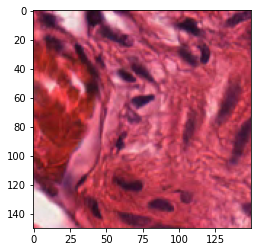

In [6]:
img =x_train[7]
plt.imshow(img)

In [7]:
x_train = np.asarray(x_train)/255.0
x_test = np.asarray(x_test)/255.0
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [8]:
x_train.shape, y_train.shape

((3062, 150, 150, 3), (3062,))

In [9]:
x_test.shape, y_test.shape

((1313, 150, 150, 3), (1313,))

In [10]:
np.min(x_train), np.max(x_train) # 0과 1사이로 변함 

(0.0, 1.0)

In [74]:
#model 생성
#다른 데이터에서 움직이는 모델을 가져다 써도 계속 같은 값이 나옴. 데이터 문제인듯.. 
model = keras.Sequential([
    layers.Input((150,150,3)),
    layers.Conv2D(16, (3,3), 1, activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32, (3,3), 1, activation='relu'),
    layers.MaxPool2D((2,2)),    
    layers.Conv2D(64, (3,3), 1, activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), 1, activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='softmax')
    
])

In [75]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [76]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=20, batch_size = 32, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/20
110/110 [==============================] - 2s 17ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 2/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 3/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 4/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 5/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 6/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37.8893 - val_accuracy: 0.1247
Epoch 7/20
110/110 [==============================] - 1s 12ms/step - loss: -38.2233 - accuracy: 0.1251 - val_loss: -37

In [20]:
import matplotlib.pyplot as plt

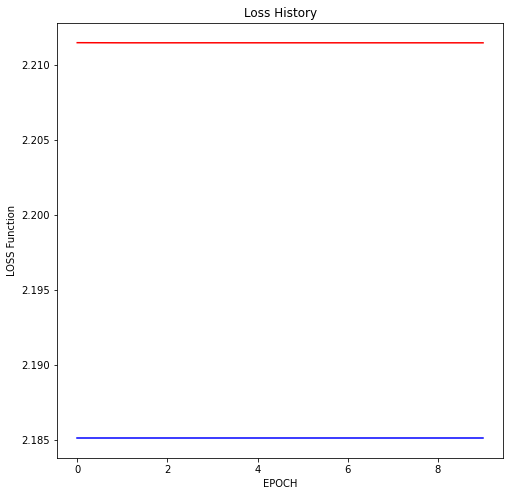

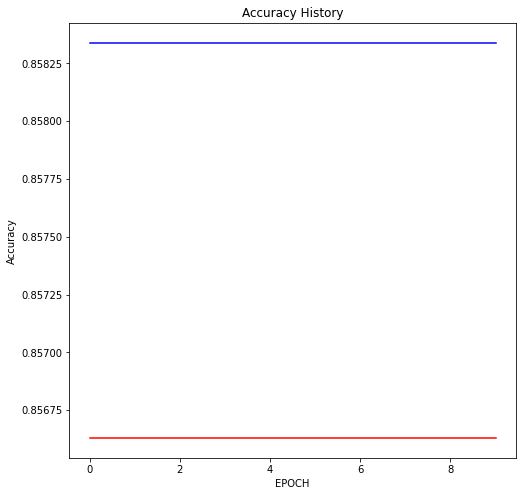

In [21]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

# 세포 종류 진단 

In [95]:
path = r'C:\Users\admin\Documents\test\2021_12_23\[10장] CNN 활용하기\3_10_2_세포 종류 진단\data'
dirs = os.listdir(path)
dirs

['01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [96]:
X = []
y = []
for i in range(len(dirs)):
    files = os.listdir(path + '/'+dirs[i])
    #print(files)
    for j in files:
        img = Image.open(path + '/'+dirs[i]+'/'+j)
        X.append(np.asarray(img))
        y.append(i)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 10)

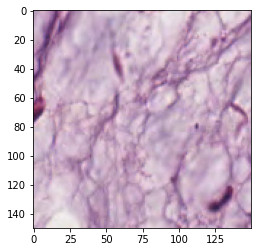

In [98]:
img =x_train[2]
plt.imshow(img)

In [99]:
x_train = np.asarray(x_train)/255.0
x_test = np.asarray(x_test)/255.0
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [100]:
x_train.shape, y_train.shape

((3500, 150, 150, 3), (3500,))

In [101]:
x_test.shape, y_test.shape

((1500, 150, 150, 3), (1500,))

In [102]:
#model 생성

model = keras.Sequential([
     keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(8, activation="softmax")
    
])

In [103]:
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [104]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=20, batch_size=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/20
70/70 [==============================] - 2s 22ms/step - loss: 1.4825 - accuracy: 0.3529 - val_loss: 1.2435 - val_accuracy: 0.4280
Epoch 2/20
70/70 [==============================] - 1s 19ms/step - loss: 1.0426 - accuracy: 0.5511 - val_loss: 0.9572 - val_accuracy: 0.5267
Epoch 3/20
70/70 [==============================] - 1s 19ms/step - loss: 0.9347 - accuracy: 0.6060 - val_loss: 0.9264 - val_accuracy: 0.6020
Epoch 4/20
70/70 [==============================] - 1s 20ms/step - loss: 0.9105 - accuracy: 0.6246 - val_loss: 0.8415 - val_accuracy: 0.6387
Epoch 5/20
70/70 [==============================] - 1s 20ms/step - loss: 0.8193 - accuracy: 0.6654 - val_loss: 0.7116 - val_accuracy: 0.7460
Epoch 6/20
70/70 [==============================] - 1s 20ms/step - loss: 0.7881 - accuracy: 0.6809 - val_loss: 0.7663 - val_accuracy: 0.6773
Epoch 7/20
70/70 [==============================] - 1s 19ms/step - loss: 0.7581 - accuracy: 0.6846 - val_loss: 0.7506 - val_accuracy: 0.6253
Epoch 8/20
70

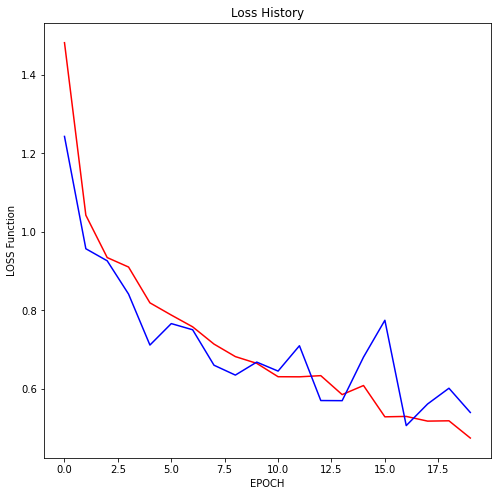

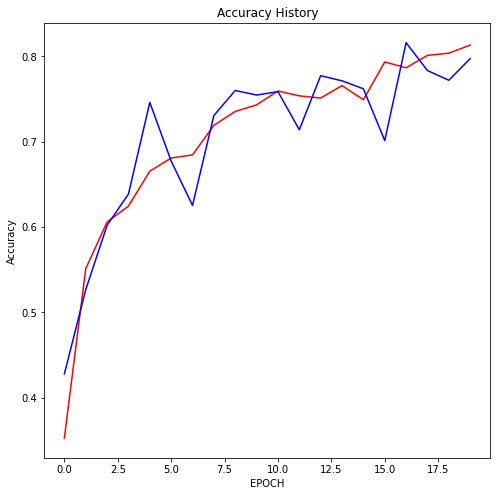

In [105]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [106]:
#오버피팅을 잡아보자 
model = keras.Sequential([
     keras.layers.Conv2D(16, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.15),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(8, activation="softmax")
    
])

In [107]:
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [108]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50,
                    validation_data=(x_test, y_test), shuffle=True,
                    callbacks=[early_stop])

Epoch 1/20
70/70 [==============================] - 2s 22ms/step - loss: 1.7649 - accuracy: 0.2229 - val_loss: 1.5861 - val_accuracy: 0.3013
Epoch 2/20
70/70 [==============================] - 1s 20ms/step - loss: 1.5005 - accuracy: 0.3246 - val_loss: 1.4982 - val_accuracy: 0.3173
Epoch 3/20
70/70 [==============================] - 1s 19ms/step - loss: 1.2610 - accuracy: 0.4294 - val_loss: 1.1500 - val_accuracy: 0.4613
Epoch 4/20
70/70 [==============================] - 1s 19ms/step - loss: 1.0674 - accuracy: 0.5146 - val_loss: 1.0833 - val_accuracy: 0.5667
Epoch 5/20
70/70 [==============================] - 1s 19ms/step - loss: 1.0250 - accuracy: 0.5474 - val_loss: 0.9917 - val_accuracy: 0.6347
Epoch 6/20
70/70 [==============================] - 1s 19ms/step - loss: 0.9687 - accuracy: 0.5726 - val_loss: 0.9279 - val_accuracy: 0.5227
Epoch 7/20
70/70 [==============================] - 1s 19ms/step - loss: 0.9658 - accuracy: 0.5694 - val_loss: 0.8965 - val_accuracy: 0.6307
Epoch 8/20
70

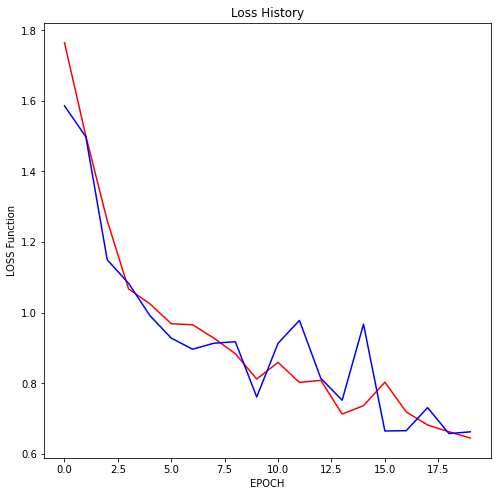

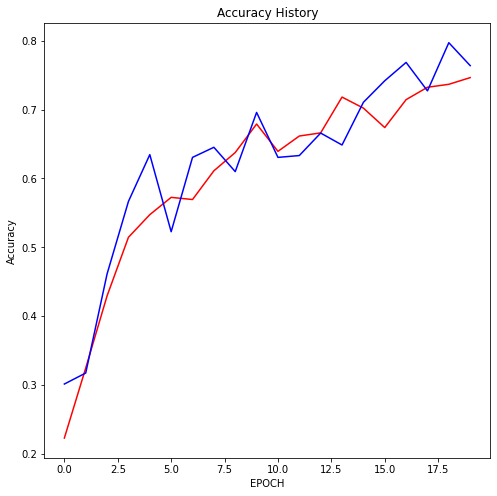

In [110]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

#  CT 폐암 진단  

In [77]:
path = r'C:\Users\admin\Documents\test\2021_12_23\[10장] CNN 활용하기\3_10_3_CT영상 폐암 진단\data'
dirs = os.listdir(path)
dirs

['annotations', 'images']

In [87]:
X = []
y = []
for i in range(len(dirs)):
    files = os.listdir(path+'/'+dirs[i])
    for j in files:
        img = Image.open(path+'/'+dirs[i]+'/'+j)
        X.append(np.asarray(img))
        y.append(i)

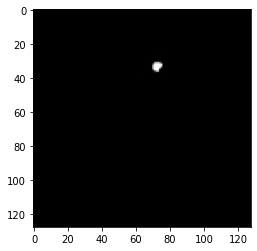

In [88]:
imgx= X[0]
plt.imshow(imgx)

In [89]:
X = np.asarray(X)/255.0
y = np.asarray(y)

In [90]:
X.shape

(2206, 128, 128, 3)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=25)

In [92]:
x_train.shape, y_train.shape

((1544, 128, 128, 3), (1544,))

In [93]:
x_test.shape, y_test.shape

((662, 128, 128, 3), (662,))

In [ ]:
#U-net을 알아야 진행할 수 있음 ㅇ0ㅇ!